# Интерполирование функций

In [1]:
import random
# модули для математических операций
import math
import numpy as np
import scipy.integrate as integrate # вычисление интегралов
import scipy.special as special
# модули для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
# модули для работы с данными
import pandas as pd
pd.options.display.float_format ='{:,.5f}'.format

# Постановка задачи

1. На отрезке $[a,b]$ задана таблица значений функции $f(x)$ с шагом $h$. Погрешность каждого заданного значения не превышает $\varepsilon$. Используя интерполирование Ньютона для начала и конца таблицы, с помощью многочленов минимальной степени построить таблицу значений функции $f(x)$ с шагом $0.5h$. Погрешность каждого нового значения также не должна превышать заданной величины $\varepsilon$. В отчет включить обе таблицы значений, а также подробное описание выбора степени интерполирующих многочленов.

$$f(x) = x\cos x,\quad [a,b] = [0,p],\quad h = \dfrac{p}{20},\quad \varepsilon = 10^{-5}$$

2. На отрезке $[a,b]$ заданы функции $f_1(x)$ и $f_2(x)$. Построить многочлены степени $n=3,5,7,10,15,20$, интерполирующие каждую из них по узлам

а) равномерно расположенным на указанном отрезке;

б) расположенным на указанном отрезке оптимальным (минимизирующим погрешность) образом;

В отчет включить графики полученных интерполяционных многочленов, представление использованное при их построении, а также способ выбора узлов.

$$f_1(x) = \cos x,\quad f_2(x) = |x| - 1,\quad [a,b] = [-3, 3].$$

# Задача 1

In [2]:
def f(x):
    return x * np.cos(x)

In [3]:
p = 2
h = p / 20
a, b = 0, p
num_of_nodes = int(1 / h)
interpolation_nodes = np.around(np.linspace(a, b, num=num_of_nodes), 5)


interpolation_nodes_table = pd.DataFrame.from_dict({'x' : interpolation_nodes, 
                                                    'f(x)' : np.around(f(interpolation_nodes), 5)}, orient='index')

In [4]:
interpolation_nodes_table

,0,1,2,3,4,5,6,7,8,9
x,0.00000,0.22222,0.44444,0.66667,0.88889,1.11111,1.33333,1.55556,1.77778,2.00000
f(x),0.00000,0.21676,0.40126,0.52393,0.56024,0.49296,0.31365,0.02370,-0.36535,-0.83229


# Задача 2

По условию задачи нам даны две функции, для которых мы должны построить интерполяционные многочлены, $$f_1(x) = \cos x,\quad f_2(x) = |x| - 1.$$
Сразу определим для них соответствующие компьютерные функции.

In [5]:
def f_1(x):
    return np.cos(x)

def f_2(x):
    return abs(x) - 1

## Интерполирование многочленами по узлам равномерно расположенным на отрезке

Проведем разбиение всего отрезка $[-3; 3]$ на $n$ равномерных частей, где $n =3,5,7,10,15,20$.

In [6]:
a, b = -3, 3

interpolation_3_nodes = np.linspace(a, b, 3)
interpolation_5_nodes = np.linspace(a, b, 5)
interpolation_7_nodes = np.linspace(a, b, 7)
interpolation_10_nodes = np.linspace(a, b, 10)
interpolation_15_nodes = np.linspace(a, b, 15)
interpolation_20_nodes = np.linspace(a, b, 20)

interpolation_nodes_table = pd.DataFrame.from_dict({'3 nodes' : interpolation_3_nodes, 
                                          '5 nodes' : interpolation_5_nodes, 
                                          '7 nodes' : interpolation_7_nodes,
                                          '10 nodes' : interpolation_10_nodes, 
                                          '15 nodes' : interpolation_15_nodes, 
                                          '20 nodes' : interpolation_20_nodes}, orient='index').T.fillna(' ')

In [7]:
interpolation_nodes_table

,3 nodes,5 nodes,7 nodes,10 nodes,15 nodes,20 nodes
0,-3.00000,-3.00000,-3.00000,-3.00000,-3.00000,-3.00000
1,0.00000,-1.50000,-2.00000,-2.33333,-2.57143,-2.68421
2,3.00000,0.00000,-1.00000,-1.66667,-2.14286,-2.36842
3,,1.50000,0.00000,-1.00000,-1.71429,-2.05263
4,,3.00000,1.00000,-0.33333,-1.28571,-1.73684
5,,,2.00000,0.33333,-0.85714,-1.42105
6,,,3.00000,1.00000,-0.42857,-1.10526
7,,,,1.66667,0.00000,-0.78947
8,,,,2.33333,0.42857,-0.47368
9,,,,3.00000,0.85714,-0.15789


### Построение интерполяционного многочлена Лагранжа

Запишем общие формулы для построения интерполяционного многочлена Лагранжа.

Обозначим $$c_i = \dfrac{1}{(x_i - x_0)\ldots (x_i - x_{i-1})(x_i - x_{i+1})\ldots (x_i-x_n)}.$$


In [8]:
def c(x_i, nodes):
    product = 1
    for node in nodes:
        if node == x_i:
            continue
        product *= (x_i - node)
    return 1 / product

Введем в рассмотрение полином $(n+1)$-ой степени $$\omega_{n+1}(x) = (x-x_0)\ldots (x-x_n).$$

In [9]:
def w(x, nodes):
    product = 1
    for node in nodes:
        product *= (x - node)
    return product

Тогда $$c_i = \dfrac{1}{w'_{n+1}(x_i)}.$$
Отсюда мы можем записать формулу $$P_n(x) = \sum_{i=0}^{n}l_i(x)f(x_i) = \sum_{i=0}^{n}\dfrac{w_{n+1}(x)}{(x-x_i)w'_{n+1}(x_i)}f(x_i).$$
Эта формула называется **формулой Лагранжа для интерполяционного многочлена $P_n$**.

Зададим компьютерную функцию, которая будут вычислять значение этого многочлена при заданном $x$.

In [10]:
def lagrange_interpolation(x, nodes, function):
    summary = 0
    for node in nodes:
        summary += w(x, nodes) * function(node) * c(node, nodes) / (x - node)
    return summary

Теперь реализуем цикл, который будет для каждого $n$ узлов строить график обеих рассматриваемых функций $f_1(x)$, $f_2(x)$ на указанном отрезке $[a,b]$

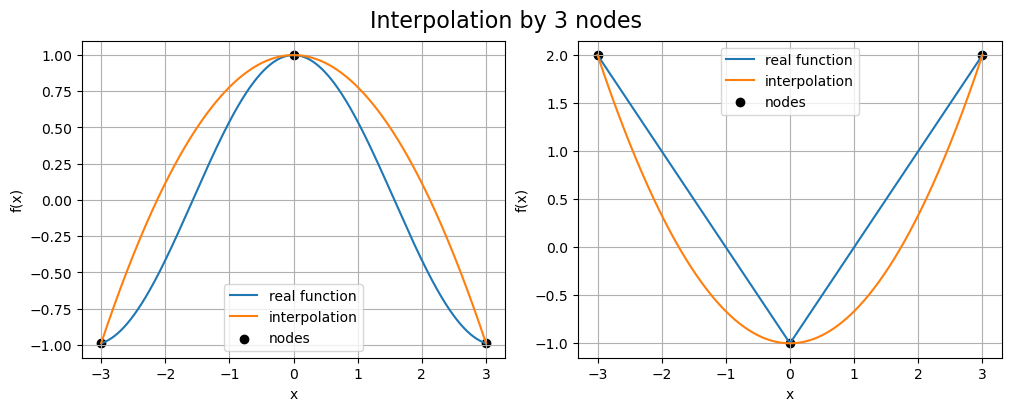

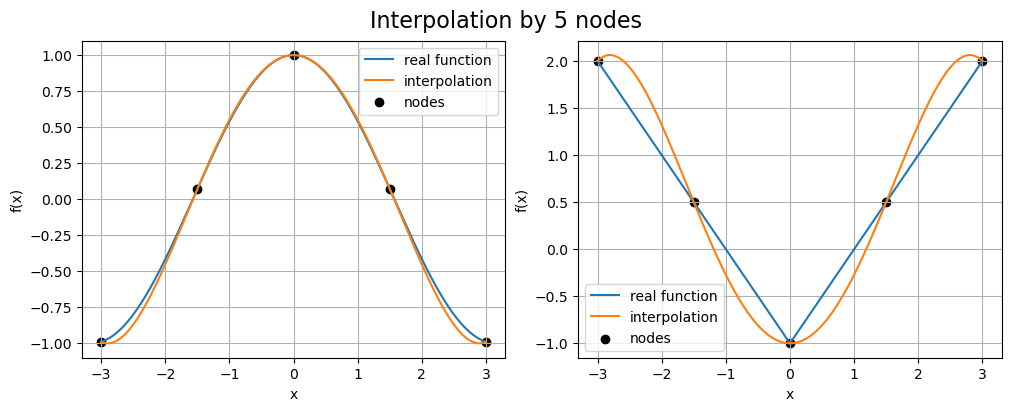

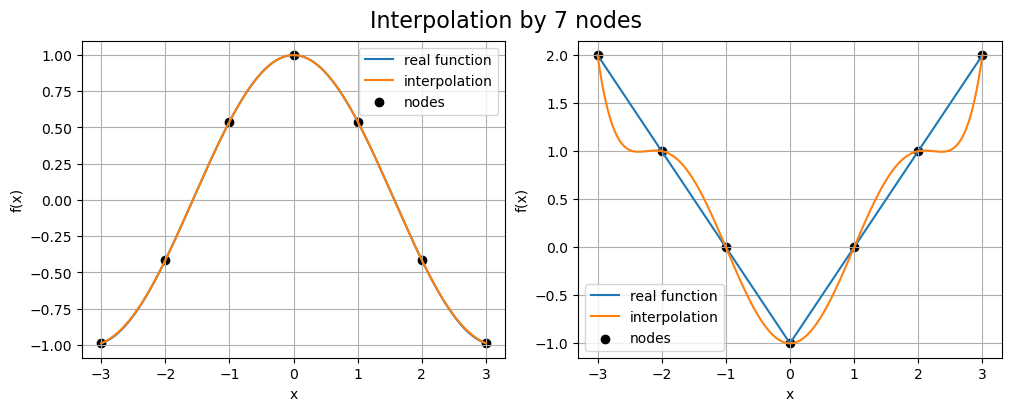

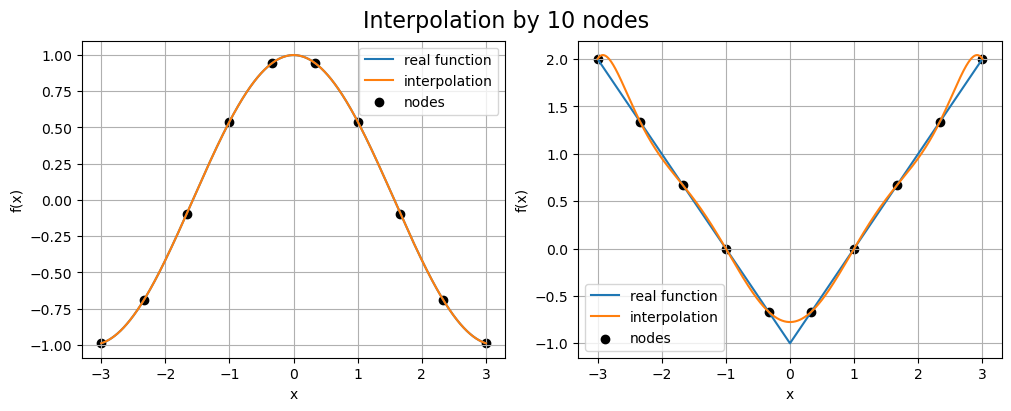

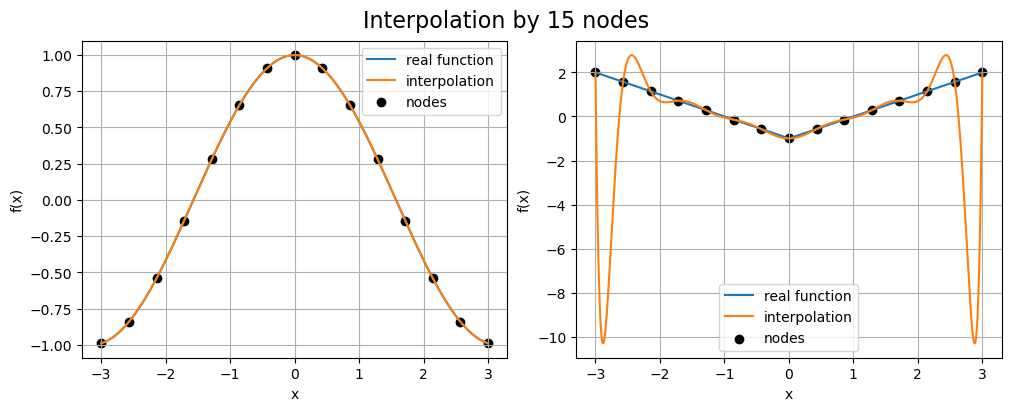

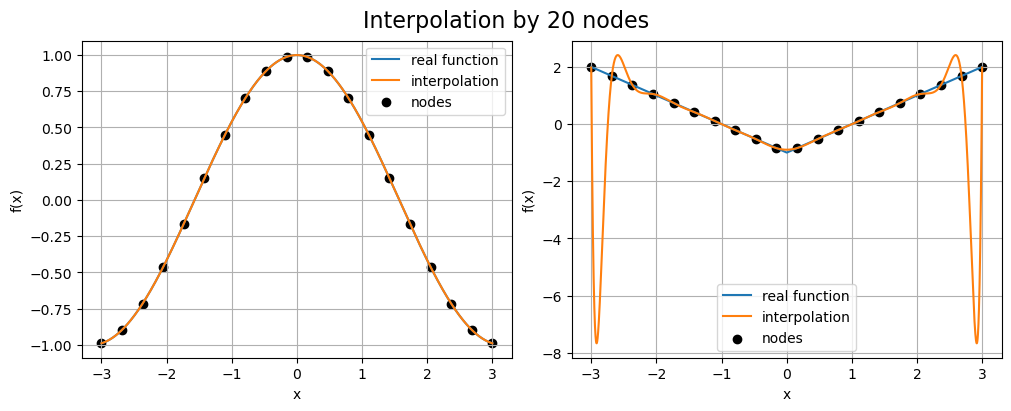

In [11]:
x = np.linspace(a, b, 100000) # берем 100000 точек интерполирования на отрезке [a,b]
for nodes_num in [3, 5, 7, 10, 15, 20]: # проходим циклом по всевозможным количествам узлов
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout='constrained', sharey=False)
    
    interpolation_nodes = np.linspace(a, b, nodes_num) # задаем множество узлов
    plot_dots = np.setdiff1d(x, interpolation_nodes) # из множества точек интерполирования исключаем те, которые являются узлами для избежания деления на 0.
    
    # построение графика функции f_1
    ax1.plot(x, f_1(x), label='real function')
    ax1.plot(plot_dots, lagrange_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_1), label='interpolation')
    ax1.scatter(interpolation_nodes, f_1(interpolation_nodes), label='nodes', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    # построение графика функции f_2
    ax2.plot(x, f_2(x), label='real function')
    ax2.plot(plot_dots, lagrange_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_2), label='interpolation')
    ax2.scatter(interpolation_nodes, f_2(interpolation_nodes), label='nodes', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f'Lagrange Interpolation by {nodes_num} nodes', fontsize=16)

### Построение интерполяционного многочлена Ньютона

$\bullet$ **Разделенная разность нулевого порядка для функции $f(x)$** совпадает со значениями функции $f(x_i)$ в узлах интерполирования. 

**Разделенная разность первого порядка** есть $$f(x_i, x_j) = \dfrac{f(x_j) - f(x_i)}{x_j - x_i}.$$
**Разделенная разность $(k+1)$-ого порядка** $$f(x_0, \ldots, x_{k+1}) = \dfrac{f(x_1,\ldots, x_{k+1}) - f(x_0,\ldots, x_k)}{x_{k+1} - x_0}.$$
Можно показать, что справедлива формула, связывающая разделенную разность $k$-ого порядка со значениями функции в указанных узлах
$$f(x_0, x_1,\ldots, x_k) = \sum_{j=0}^{k} \dfrac{f(x_j)}{\omega_{k+1}'(x_j)},$$
где $\omega_{k+1}$ определяется из формулы. 

Определим компьютерную функцию, реализующую вычисление разделенных разностей через указанную формулу

In [12]:
def div_diff_sum(nodes, function):
    summary = 0
    for node in nodes:
        summary += function(node) * c(node, nodes)
    return summary

Также разделенные разности можно вычислять табличным способом. Для этого строица таблица наподобие $$\begin{matrix} x_0 & f(x_0) & f(x_0, x_1) & f(x_0,x_1,x_2) & \ldots & f(x_0,\ldots, x_{n-1}) & f(x_0,\ldots, x_n) \\ x_1 & f(x_1) & f(x_1, x_2) & f(x_1,x_2,x_3) & \ldots & f(x_1,\ldots, x_{n-1}) & - \\ \vdots & \vdots & \vdots & \vdots & \ddots & - & -\\ x_{n-1} & f(x_{n-1}) & f(x_{n-2}, x_{n-1}) & - & \ldots & - & - \\ x_n & f(x_n) & - & - & \ldots & - & -\end{matrix}$$

In [14]:
def div_diff_table(nodes, function, as_table=False):
    if isinstance(nodes, list):
        nodes = np.array(nodes)
    n = nodes.shape[0]
    table = np.zeros((n, n+1))
    for i in range(n):
        table[i, 0] = nodes[i]
        table[i, 1] = function(nodes[i])
    for i in range(2, n+1):
        for j in range(n-i+1):
            table[j,i] = (table[j+1,i-1] - table[j, i-1]) / (nodes[j+i-1] - nodes[j])
    if as_table:
        return table
    else:
        return table[0, n]

Для примера сравним построенную таблицу разделенных разностей и значение, которое мы можем получить через указанную ранее формулу.

In [16]:
print(div_diff_table(interpolation_5_nodes, f_1, True))

[[-3.         -0.9899925   0.70715313 -0.02921487 -0.08528685  0.02842895]
 [-1.5         0.0707372   0.61950853 -0.41300569  0.08528685  0.        ]
 [ 0.          1.         -0.61950853 -0.02921487  0.          0.        ]
 [ 1.5         0.0707372  -0.70715313  0.          0.          0.        ]
 [ 3.         -0.9899925   0.          0.          0.          0.        ]]


In [17]:
div_diff_sum(interpolation_5_nodes, f_1)

0.028428949740390824

Значение, полученное через формулу с суммой совпадает с крайним правым значением в таблице разделенных разностей (возможность построения разделенной разности единственная).

Используя аппарат разделенных разностей получим формулу интерполяционного многочлена. Подставляя это в формулу для тождественного представления $P_n(x)$, мы в итоге получим
$$P_n(x) = f(x_0) + (x-x_0)\cdot f(x_0, x_1) + (x-x_0)(x-x_1)\cdot f(x_0,x_1,x_2) +\ldots \\ \ldots + (x-x_0)\ldots (x-x_{n-1})\cdot f(x_0,\ldots, x_n).$$
Эта формула называется **формулой Ньютона для интерполяционного многочлена** $P_n(x)$.

Реализуем компьютерную функцию, которая будет вычислять значение интерполяционного многочлена в заданной точке $x_i$.

In [18]:
def newtow_interpolation(x, nodes, function):
    P_n = 0
    nodes_list = []
    for node in nodes:
        nodes_list.append(node)
        P_n += div_diff_table(nodes_list, function)*w(x, nodes_list[0:-1])
    return P_n

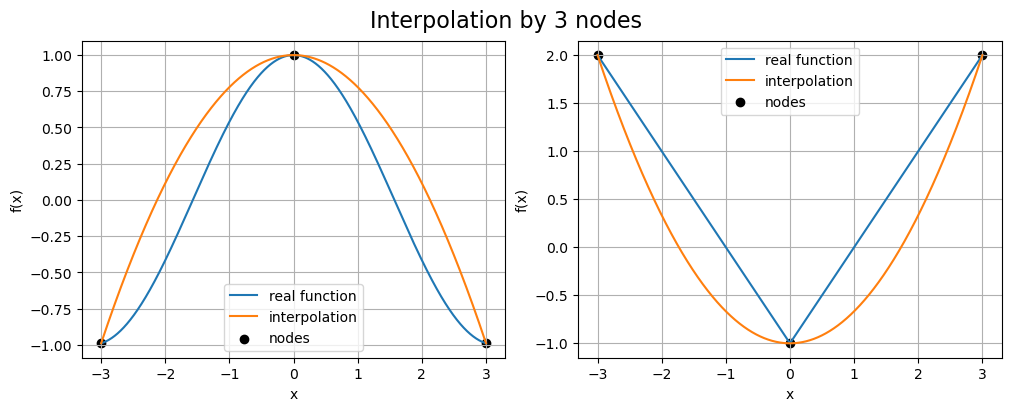

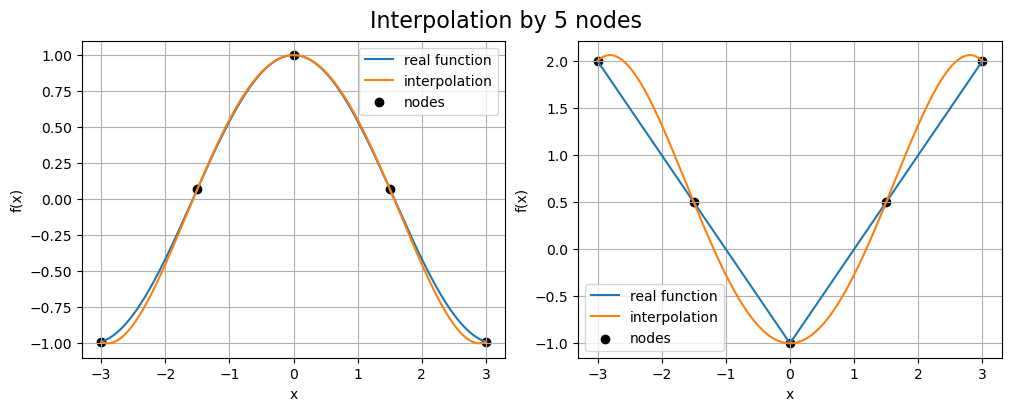

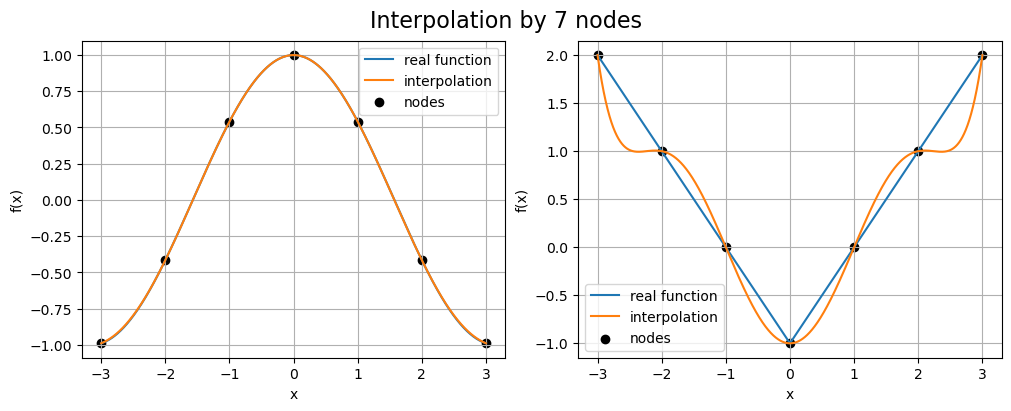

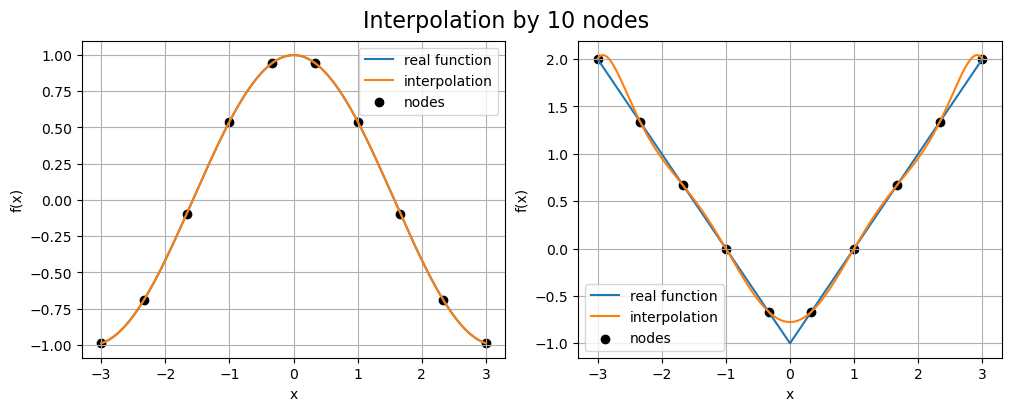

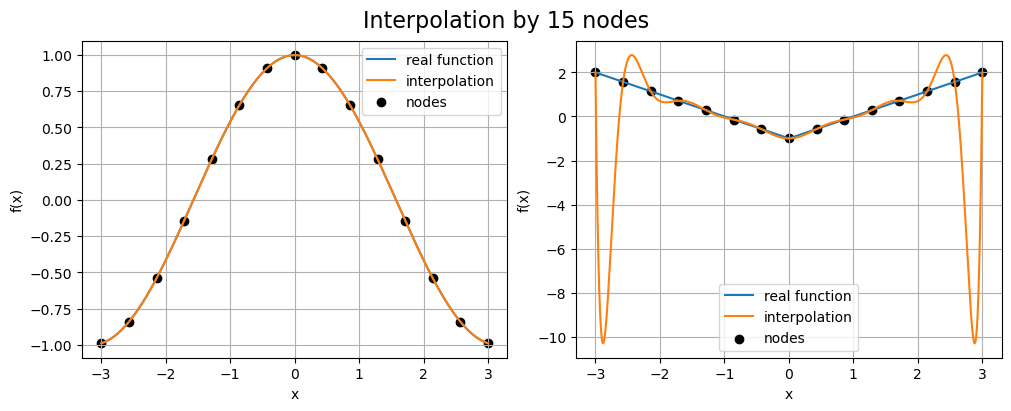

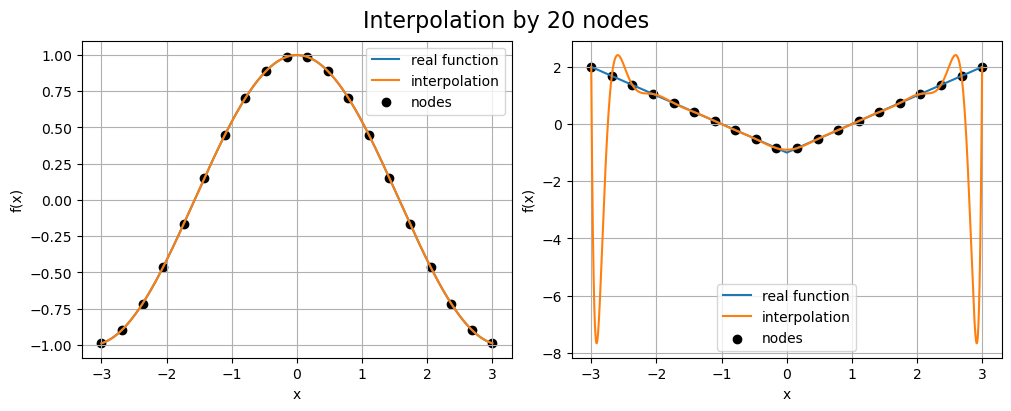

In [19]:
x = np.linspace(a, b, 100000)
for nodes_num in [3, 5, 7, 10, 15, 20]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout='constrained', sharey=False)
    
    interpolation_nodes = np.linspace(a, b, nodes_num)
    plot_dots = x

    ax1.plot(x, f_1(x), label='real function')
    ax1.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_1), label='interpolation')
    ax1.scatter(interpolation_nodes, f_1(interpolation_nodes), label='nodes', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    ax2.plot(x, f_2(x), label='real function')
    ax2.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_2), label='interpolation')
    ax2.scatter(interpolation_nodes, f_2(interpolation_nodes), label='nodes', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f"Newton's Interpolation by {nodes_num} nodes", fontsize=16)

В соответствии с корректностью поставленной задачи, а именно единственностью решения, мы можем увидеть, что оба интерполяционных многочлена дали одинаковый результат. 

Также заметим, что в случае функции $f_1(x) = \cos x$ многочлен 7-ой степени уже достаточно хорошо смог интерполировать эту функцию. В случае функции $f_2(x) = |x| - 1$ достаточно близкий к истине результат был получен при интерполяции многочленом 10-ой степени. Однако при повышении степени заметны значительные отклонения интерполяционной функции.

#### Интерполирование многочленами по узлам расположенным на указанном отрезке оптимальным образом

Для минимизации остатка интерполирования выберем узлы по формуле
$$x_k = \dfrac{a+b}{2} + \dfrac{b-a}{2}\cos \dfrac{(2k+1)\pi}{2(n+1)},\ k=\overline{0,n}.$$
Если выбрать узлами интерполирования $x_0,\ldots, x_n$ таким образом, то величина отклонения $\omega_{n+1}(x)$ от нуля окажется минимальной. 

Для упорядочивания узлов необходима перенумерация $\widetilde{x}_k = x_{n-k},\ k=\overline{0,n}.$

Составим таблицу нового разбиения на узлы (сразу зададим обратную нумерацию для упорядочивания узлов):

In [24]:
interpolation_3_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(4))) for k in range(3)][::-1]
interpolation_5_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(6))) for k in range(5)][::-1]
interpolation_7_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(8))) for k in range(7)][::-1]
interpolation_10_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(11))) for k in range(10)][::-1]
interpolation_15_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(15))) for k in range(15)][::-1]
interpolation_20_nodes_opt = [(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(20))) for k in range(20)][::-1]

interpolation_nodes_table_opt = pd.DataFrame.from_dict({'3 nodes' : interpolation_3_nodes_opt, 
                                          '5 nodes' : interpolation_5_nodes_opt, 
                                          '7 nodes' : interpolation_7_nodes_opt,
                                          '10 nodes' : interpolation_10_nodes_opt, 
                                          '15 nodes' : interpolation_15_nodes_opt, 
                                          '20 nodes' : interpolation_20_nodes_opt}, orient='index').T.fillna(' ')

In [25]:
interpolation_nodes_table_opt

,3 nodes,5 nodes,7 nodes,10 nodes,15 nodes,20 nodes
0,-1.14805,-2.12132,-2.49441,-2.72890,-2.98357,-2.99075
1,1.14805,-0.77646,-1.66671,-2.26725,-2.85317,-2.91711
2,2.77164,0.77646,-0.58527,-1.62192,-2.59808,-2.77164
3,,2.12132,0.58527,-0.84520,-2.22943,-2.55792
4,,2.89778,1.66671,0.00000,-1.76336,-2.28122
5,,,2.49441,0.84520,-1.22021,-1.94834
6,,,2.94236,1.62192,-0.62374,-1.56750
7,,,,2.26725,0.00000,-1.14805
8,,,,2.72890,0.62374,-0.70034
9,,,,2.96946,1.22021,-0.23538


Сначала приведем интерполяцию многочленом Лагранжа:

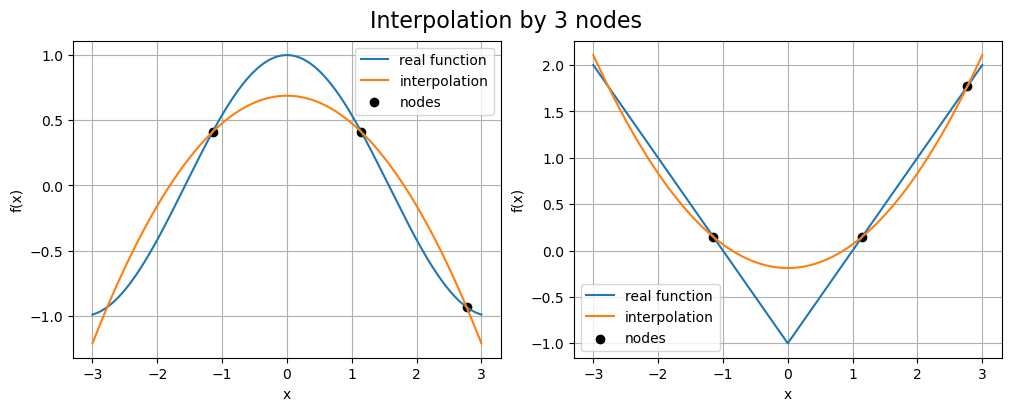

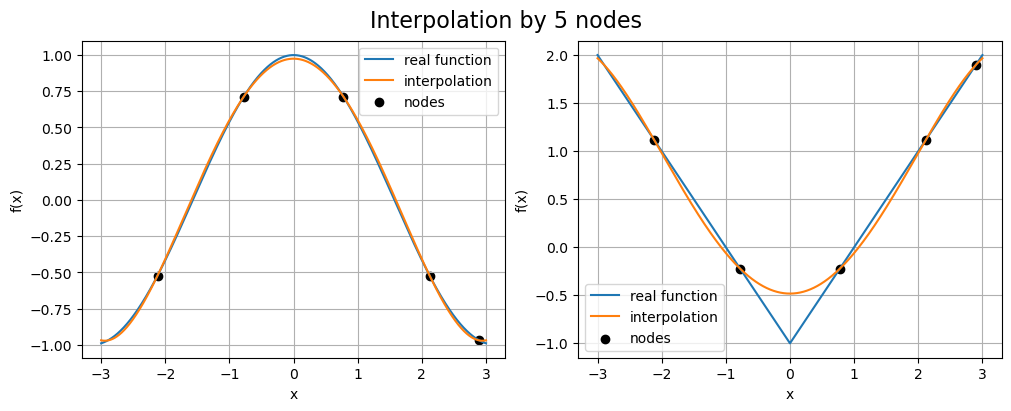

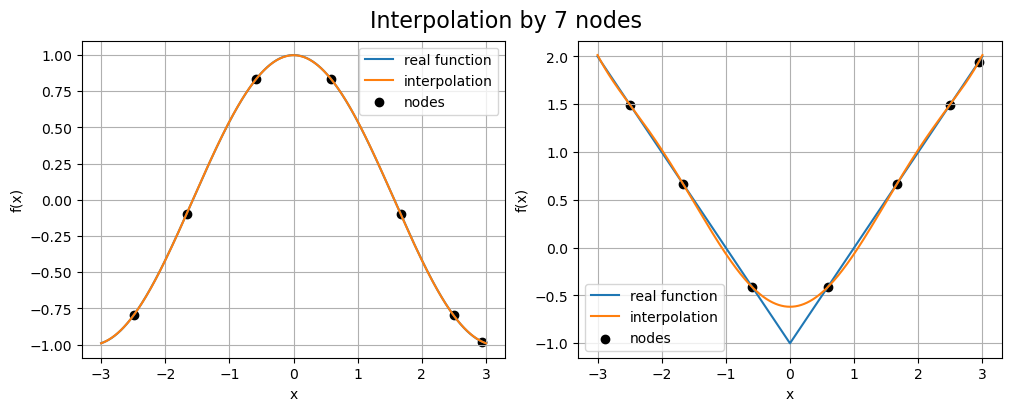

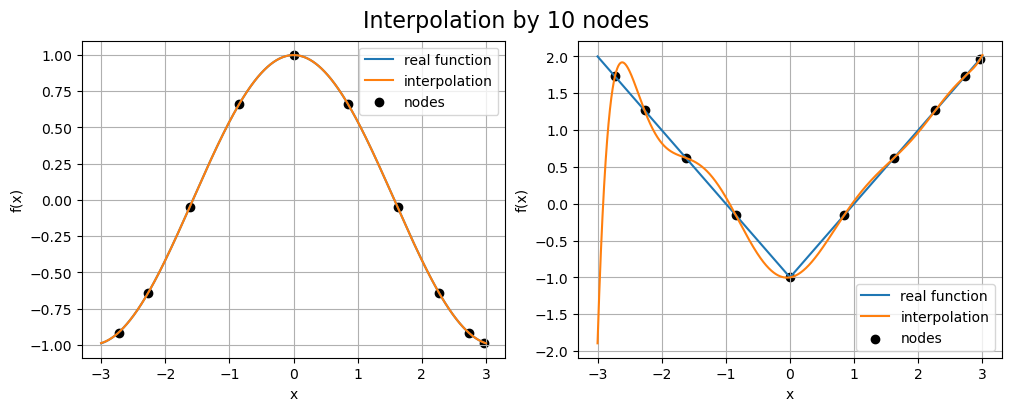

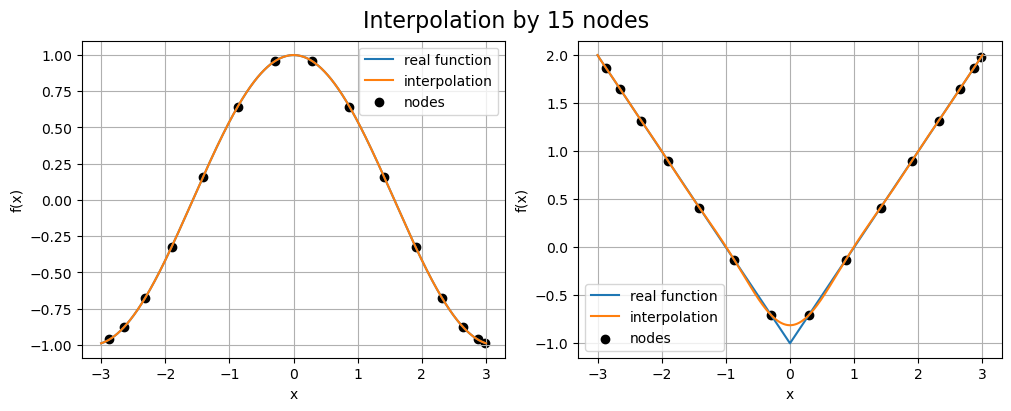

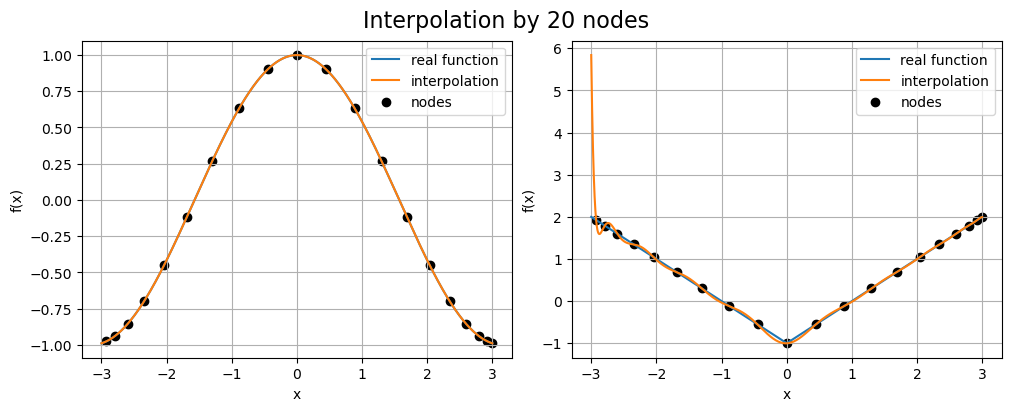

In [26]:
x = np.linspace(a, b, 100000)
for nodes_num in [3, 5, 7, 10, 15, 20]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout='constrained', sharey=False)
    
    interpolation_nodes = np.array([(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(nodes_num+1))) for k in range(nodes_num)][::-1])
    plot_dots = np.setdiff1d(x, interpolation_nodes)

    ax1.plot(x, f_1(x), label='real function')
    ax1.plot(plot_dots, lagrange_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_1), label='interpolation')
    ax1.scatter(interpolation_nodes, f_1(interpolation_nodes), label='nodes', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    ax2.plot(x, f_2(x), label='real function')
    ax2.plot(plot_dots, lagrange_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_2), label='interpolation')
    ax2.scatter(interpolation_nodes, f_2(interpolation_nodes), label='nodes', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f'Interpolation by {nodes_num} nodes', fontsize=16)

Теперь приведем интерполирование многочленом Ньютона

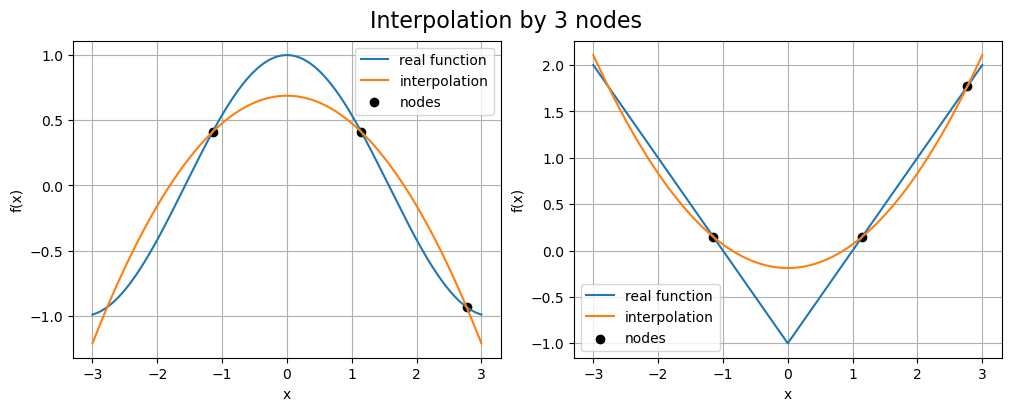

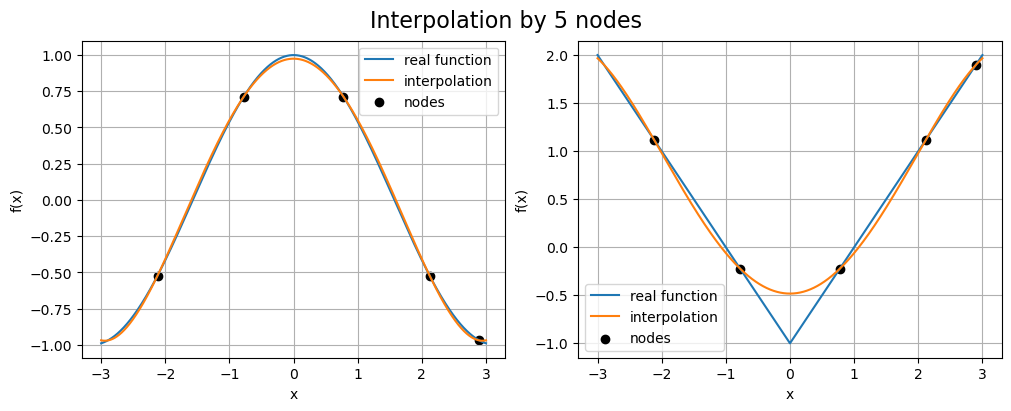

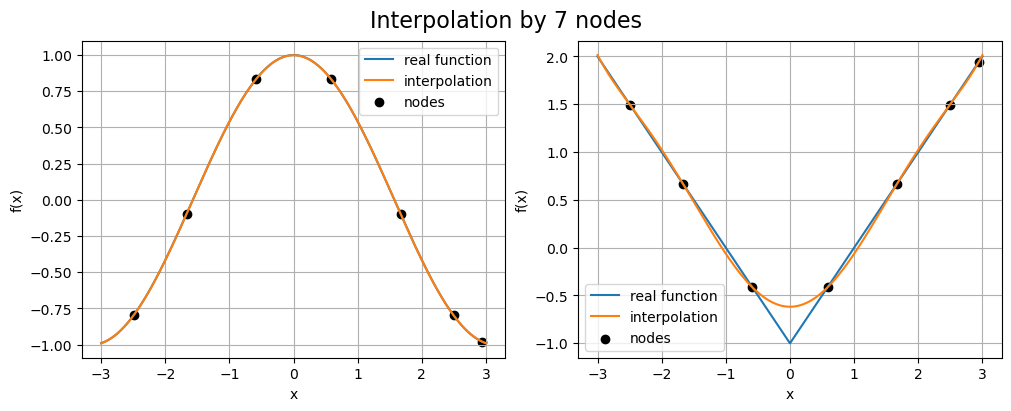

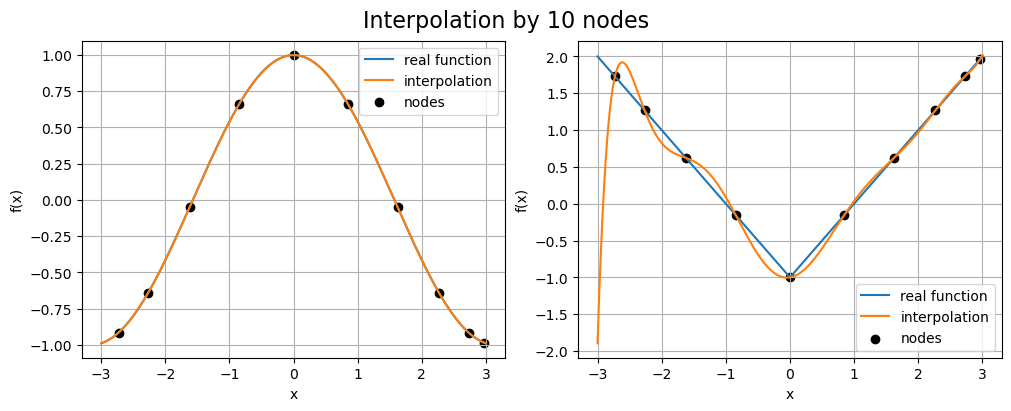

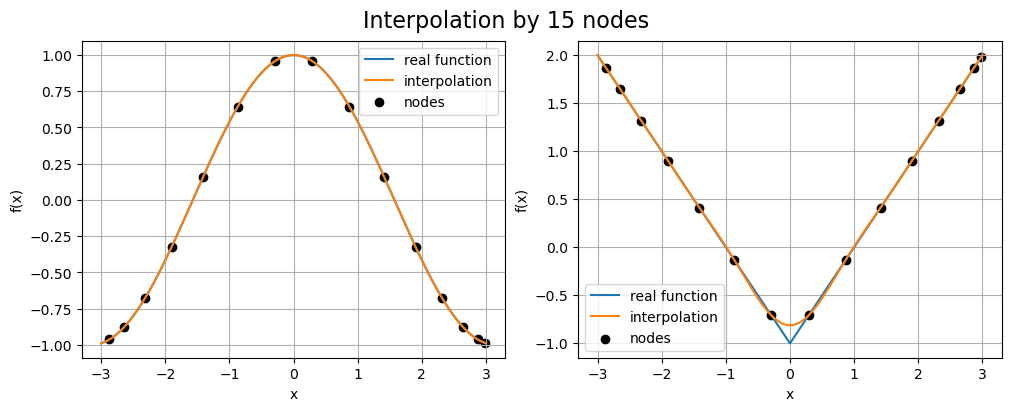

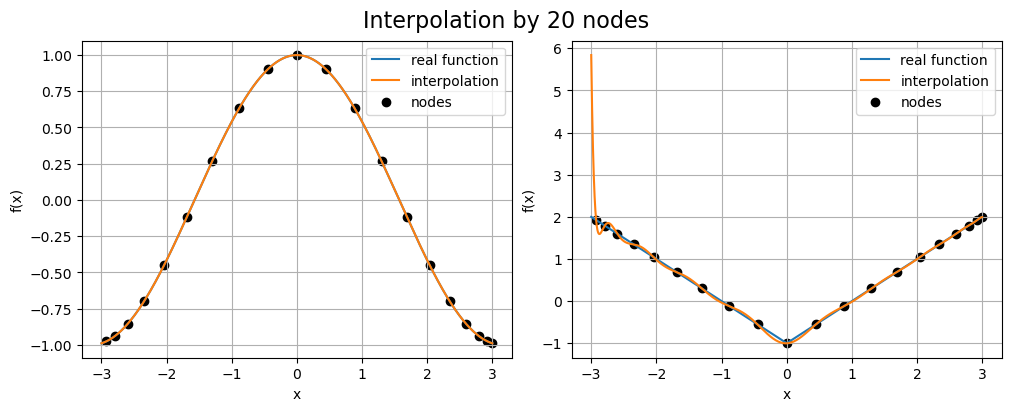

In [27]:
x = np.linspace(a, b, 100000)
for nodes_num in [3, 5, 7, 10, 15, 20]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), layout='constrained', sharey=False)
    
    interpolation_nodes = np.array([(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(nodes_num+1))) for k in range(nodes_num)][::-1])
    plot_dots = x

    ax1.plot(x, f_1(x), label='real function')
    ax1.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_1), label='interpolation')
    ax1.scatter(interpolation_nodes, f_1(interpolation_nodes), label='nodes', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    ax2.plot(x, f_2(x), label='real function')
    ax2.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=interpolation_nodes, function=f_2), label='interpolation')
    ax2.scatter(interpolation_nodes, f_2(interpolation_nodes), label='nodes', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f'Interpolation by {nodes_num} nodes', fontsize=16)

Заметим, что в данном случае узлы были распределены немного иным образом, отличным от предыдущего случая. Достаточно хорошо удалось интерполировать функцию $f_1(x) = \cos x$ многочленом 5-ой степени, а практически идеально все так же многочленом 7-ой степени. В случае функции $f_2(x) = |x| - 1$ достаточно хорошим результат оказался в случае полинома 15-ой степени. Но в полиномах 10-ой и 20-ой степеней заметны резкие отклонения интерполяционной функции от реальной.

## Вывод
Таким образом, мы построили интерполяционные многочлены в форме Ньютона и Лагранжа, а также исследовали отличия при взятии равностоящих узлов и узлов, расположенных оптимальным образом. Заметно, что при взятии узлов оптимальным образом интерполирование функции $f_2(x) = |x| - 1$ гораздо лучше описывает реальную функцию. Однако в обоих случаях присутствуют участки резкого отклонения интерполяционной функции от реальной. Это связано со спецификой самой функции $|x|$ (для нее интерполяционный процесс при равноотстоящих узлах вообще говоря сходится не во всех точках на $[-1, 1]$).